In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [ ]:
#expects a tab delimited csv file where first column is header and second column is the sequence itself
# to generate a csvnfile like this from fasta on the command line use this ruby script:
#ruby -e 'first_line = true; while line = STDIN.gets; line.chomp!; if line =~ /^>/; puts unless first_line; print line[1..-1]; print "\t"; else; print line; end; first_line = false; end; puts' < sequence.fasta > virus_mrna.fasta.csv
def RfamStats (filename):
  RF = pd.read_csv(filename, header=None, delimiter = '\t')
  RF['label'] = filename
  rf_len = (lambda x:[len(str(i)) for i in x])(RF[1].tolist())
  RF['len'] = rf_len
  RF = RF[RF['len'] < 3000]
  a = {
      'fam' : filename,
      'num_sequences' :len(RF[1].tolist()),
       'max' : max(RF['len']),
       'min' :min(RF['len']),
       'mean' : np.mean(RF['len']),
       'std' : np.std(RF['len']),
       'median' : np.median(RF['len']),
  }
  print('number of sequences')
  print(len(RF[1].tolist()))
  print('_________')
  print('max')
  print(max(RF['len']))
  print('_________')
  print('min')
  print(min(RF['len']))
  print('_________')
  print('mean')
  print(np.mean(RF['len']))
  print('_________')
  print('median')
  print(np.median(RF['len']))
  print('_________')
  print('std')
  print(np.std(RF['len']))
  print('_________')
  print('hist of length distribution')
  RF['len'].hist(bins=50)
  return a, RF


number of sequences
14465
_________
max
86
_________
min
59
_________
mean
65.97663325267888
_________
median
66.0
_________
std
0.8139002402414047
_________
hist of length distribution
number of sequences
11069
_________
max
2994
_________
min
4
_________
mean
1062.877586051134
_________
median
981.0
_________
std
706.5970316776278
_________
hist of length distribution
number of sequences
12315
_________
max
496
_________
min
160
_________
mean
235.52326431181487
_________
median
233.0
_________
std
29.716861309773567
_________
hist of length distribution
number of sequences
75164
_________
max
299
_________
min
125
_________
mean
178.51209355542548
_________
median
179.0
_________
std
5.459633151921394
_________
hist of length distribution
number of sequences
15729
_________
max
342
_________
min
37
_________
mean
86.38832729353423
_________
median
78.0
_________
std
20.05051808010858
_________
hist of length distribution
number of sequences
58371
_________
max
393
_________
min
91
_

,0,1,label,len
5112,CM000672.2/85673226-85673291 Homo sapiens chro...,TCTTACAGATGAGCAAAGAAAGTGGCTTCTTGAGATAGAATATACT...,RF00994.fa.csv,66
4006,CM000571.1/45077396-45077461 Pongo abelii chro...,TCTTATGGAAGAACAAAGAAAGTGGTTTCTTGAGATGGAATCTACT...,RF00994.fa.csv,66
12781,CM000314.3/122223259-122223323 Pan troglodytes...,TCCTACGGATGAGCAAAGAAGTGGCTTCTTGAGATGGAATCTACTC...,RF00994.fa.csv,65
819,ALWS01073947.1/14042-14108 Pteropus alecto con...,TCTTAAGGATGAGCAAAGAAAGTGGTTTTTGAGATGGAATCTTCTC...,RF00994.fa.csv,67
12518,CM000296.1/51867683-51867618 Macaca mulatta ch...,TCTTATGGATAAGCAAAGAAAGTGGTTTGTTGAGATATAATCTACT...,RF00994.fa.csv,66
...,...,...,...,...
19726,CM000671.2/87998335-87998229 Homo sapiens chro...,GTGCTTGCTTCTGCAGCACATATACTAAAACTGGAACGATACAGAG...,RF00026.fa.csv,107
23349,ALAR01026327.1/14565-14461 Tupaia chinensis co...,GTGCTTGCTTCAGCAGCACATATACTAAAATTGGAAAGATACAGAG...,RF00026.fa.csv,105
36912,GL010028.1/15448774-15448879 Loxodonta african...,AGTGCTTGCACCGGCACCACATATAAAAATTGGAACCATACAGACA...,RF00026.fa.csv,106
4891,CM000872.1/65838925-65838823 Callithrix jacchu...,TTGCTCTGACAGCACATATCCTAAAATTGGATACATAGAGAGAAGA...,RF00026.fa.csv,103


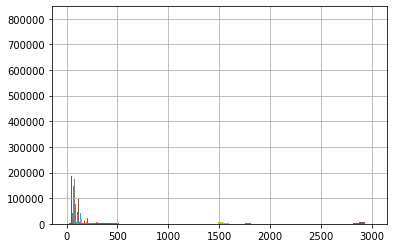

In [ ]:
df_list = []
df_RF_list = []
for file in os.listdir('./'):
  if file.endswith(".csv"):
    a, RF = RfamStats(file)
    df_list.append(a)
    df_RF_list.append(RF.sample(n = min(RF[1].shape[0], 20000), replace = False))
pd.DataFrame(df_list)
big_RF = pd.concat(df_RF_list)
big_RF

In [ ]:
big_RF.reindex
big_RF = big_RF.reset_index()

In [ ]:
big_RF_512 = big_RF[big_RF.len <= 512]

In [ ]:
big_RF_512.to_csv('RFAM_512_viral_subset_no_replacement.csv')

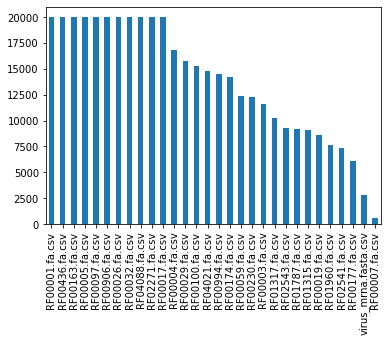

In [ ]:
big_RF_512['label'].value_counts().plot(kind='bar')

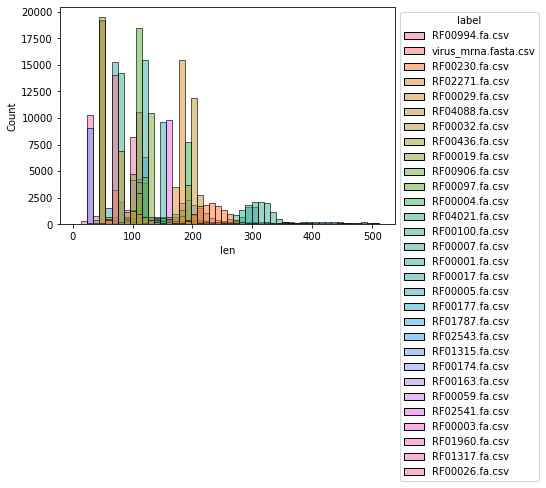

In [ ]:
ax = sns.histplot(data=big_RF_512, x="len", hue="label", bins = 50)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

number of sequences
418305
_________
max
512
_________
min
4
_________
mean
132.48350127299457
_________
median
112.0
_________
std
83.67019346166627
_________
hist of length distribution


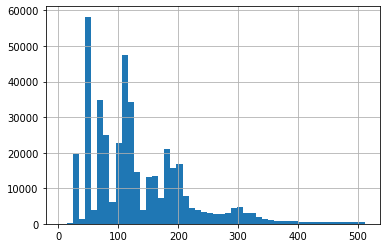

In [ ]:
RF = big_RF_512
print('number of sequences')
print(len(RF[1].tolist()))
print('_________')
print('max')
print(max(RF['len']))
print('_________')
print('min')
print(min(RF['len']))
print('_________')
print('mean')
print(np.mean(RF['len']))
print('_________')
print('median')
print(np.median(RF['len']))
print('_________')
print('std')
print(np.std(RF['len']))
print('_________')
print('hist of length distribution')
RF['len'].hist(bins=50)

In [ ]:
big_RF.to_csv('RF_20k_dataset_noreplacement.csv')

In [ ]:
RF_more_100 = big_RF[big_RF['len'] >= 100]
len(list(set(RF_more_100['label'].tolist())))

25

In [ ]:
import random
def select(x):
  inte = random.randint(0, len(x) - 300)
  return x[inte:inte+300]

def curate_dataset(RF):
  df_list = []
  for i in set(RF.label.tolist()):
    subset = RF[RF.label == i]
    subset.loc[subset.len > 300, 1] = subset.loc[subset.len > 300, 1].apply(select)
    df_list.append(subset)
    
  return pd.concat(df_list)
    

In [ ]:
RF_curated = curate_dataset(RF_more_100)
print(max(RF_curated.len.tolist()))
RF_curated.len = (lambda x:[len(str(i)) for i in x])(RF_curated[1].tolist())
print(max(RF_curated.len.tolist()))
RF_curated.to_csv('rna_RF_curated_len.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


2999
300


# LSTM MODEL

In [3]:
big_RF_512 = pd.read_csv('RFAM_512_viral_subset_no_replacement.csv')
big_RF_512

,Unnamed: 0,index,0,1,label,len
0,0,5112,CM000672.2/85673226-85673291 Homo sapiens chro...,TCTTACAGATGAGCAAAGAAAGTGGCTTCTTGAGATAGAATATACT...,RF00994.fa.csv,66
1,1,4006,CM000571.1/45077396-45077461 Pongo abelii chro...,TCTTATGGAAGAACAAAGAAAGTGGTTTCTTGAGATGGAATCTACT...,RF00994.fa.csv,66
2,2,12781,CM000314.3/122223259-122223323 Pan troglodytes...,TCCTACGGATGAGCAAAGAAGTGGCTTCTTGAGATGGAATCTACTC...,RF00994.fa.csv,65
3,3,819,ALWS01073947.1/14042-14108 Pteropus alecto con...,TCTTAAGGATGAGCAAAGAAAGTGGTTTTTGAGATGGAATCTTCTC...,RF00994.fa.csv,67
4,4,12518,CM000296.1/51867683-51867618 Macaca mulatta ch...,TCTTATGGATAAGCAAAGAAAGTGGTTTGTTGAGATATAATCTACT...,RF00994.fa.csv,66
...,...,...,...,...,...,...
418300,476294,19726,CM000671.2/87998335-87998229 Homo sapiens chro...,GTGCTTGCTTCTGCAGCACATATACTAAAACTGGAACGATACAGAG...,RF00026.fa.csv,107
418301,476295,23349,ALAR01026327.1/14565-14461 Tupaia chinensis co...,GTGCTTGCTTCAGCAGCACATATACTAAAATTGGAAAGATACAGAG...,RF00026.fa.csv,105
418302,476296,36912,GL010028.1/15448774-15448879 Loxodonta african...,AGTGCTTGCACCGGCACCACATATAAAAATTGGAACCATACAGACA...,RF00026.fa.csv,106
418303,476297,4891,CM000872.1/65838925-65838823 Callithrix jacchu...,TTGCTCTGACAGCACATATCCTAAAATTGGATACATAGAGAGAAGA...,RF00026.fa.csv,103


In [5]:
import re
  q = 0
  keep = []
  sequences = []
  for j in list(set(big_RF_512['label'].tolist())):
    rf_subset = big_RF_512[big_RF_512.label == j]
    for i in rf_subset['1'].tolist():
      l = i.replace("T", "U" )
      l = i.replace("N", "" )
      l = i.replace("t", "u" )
      l = i.replace("n", "" )
      x = re.findall("[^AUCTGauctg]", l)
      if x:
        if len(x) / len(l) > 0.01:
          q +=1
          continue
      sequences.append(l)
      keep.append(i)

print(len(sequences))
print(len(keep))
print(q)

416249
416249
2056


In [6]:
big_RF_512 = big_RF_512[big_RF_512['1'].isin(keep)]
big_RF_512['corrected_sequences'] = sequences

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#get kmers of each sequence 

def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

kmer = 6
full_list = []
for j in list(set(big_RF_512['label'].tolist())):
  rf_subset = big_RF_512[big_RF_512.label == j]
  intr_texts = [' '.join(getKmers(i, kmer)) for i in rf_subset['corrected_sequences'].tolist()]
  full_list.append(intr_texts)
#depl_texts = [' '.join(getKmers(i, kmer)) for i in depl_seqs]

In [8]:
len(intr_texts)

2656

In [9]:
#concat and organize data
merge_texts = full_list[0]
labels = list(np.full(len(full_list[0]), 0))
for j in range(len(full_list) - 1):
  merge_texts += full_list[j+1]
  labels += list(np.full(len(full_list[j+1]), j+1))

In [10]:
#one hot encoding with padding 
import numpy as np
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
#merge_texts = intr_texts + depl_texts
#labels = list(np.ones(len(intr_texts))) + list(np.zeros(len(depl_texts)))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(merge_texts)
encoded_docs = tokenizer.texts_to_sequences(merge_texts)
max_length = max([len(s.split()) for s in merge_texts])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

X_train,X_test,y_train,y_test = train_test_split(X,labels,
                                                 test_size=0.20,random_state=42)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
print(X_train.shape)
print(vocab_size)

(332999, 507)
11728


In [11]:
# LSTM MODEL
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100,dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(30, activation = 'softmax'))

epochs = 3
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint("LSTM.weights.best.hdf5", monitor='val_acc',verbose = 1,
                           save_best_only = True, mode = 'max')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1172800   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
Total params: 1,356,730
Trainable params: 1,356,730
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.utils import to_categorical
type(X_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train, 30)
y_test = to_categorical(y_test, 30)

In [13]:
y_train.shape

(332999, 30)

In [ ]:
#training and testing
import matplotlib.pyplot as plt
epochs = 5
batch_size = 64
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, 
                    batch_size = batch_size, shuffle = True, 
                    callbacks = [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


plt.figure(figsize=(20,15))
plt.plot(history.history['loss']); plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 20); plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validation'], fontsize = 20)

plt.figure(figsize=(20,15))
plt.plot(history.history['acc']); plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20); plt.xlabel('Epoch', fontsize = 20)
plt.legend(['Train', 'Validation'], fontsize = 20)

Epoch 1/5
 278/4163 [=>............................] - ETA: 3:30:48 - loss: 1.8196 - accuracy: 0.4743

In [ ]:
#